<a href="https://colab.research.google.com/github/khamzovich/SQL/blob/main/skypro_SQL_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install psycopg2-binary

In [2]:
import sys
import os

import pandas as pd

import psycopg2
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Домашнее задание


# 🎈🍾 🎉





Вы работаете в крупном онлайн-магазине, который реализует товары «всё для праздников». Вам необходимо провести ABC-анализ и выявить наиболее важные товары на основе объемов продаж и популярности. Эта информация составит план закупок на весь следующий год. 

**ABC-анализ** позволяет определить наиболее важные ресурсы компании на основе объемов продаж и прибыли.

В основе ABC-анализа лежит __«Принцип Парето»: 20% ресурсов приносят 80% прибыли__. Именно этот вид анализа позволяет выделить те самые  группы товаров, ресурсов, клиентов, поставщиков и т. п., которые и приносят компании основную прибыль.

__Задача анализа разделить товары на группы по принципу:__

- А — наиболее ценные, 20% — ассортимента (номенклатура); 80% — продаж
- В — промежуточные, 30% — ассортимента; 15% — продаж
- С — наименее ценные, 50% — ассортимента; 5% — продаж

## Задание 1

Сохраните все данные из таблицы `products` из PostgreSQL в дата-фрейм `products` и подготовьте данные к анализу.

1. Подгрузите данные для подключения
2. Подключите нужную библиотеку для работы с PostgreSQL
3. Создайте соединение с БД
4. Создайте запрос и выгрузите все данные из таблицы `products`
5. Положите данные в дата-фрейм `products`
6. Приведите данные к удобному типу: числа к числовому типу, идентификаторы — к текстовому


In [5]:
# import sys
# import os

path = '/content/drive/MyDrive/Colab Notebooks/_tutorials/SQL'
sys.path.append(os.path.abspath(path))

In [7]:
from postgresql_secret import pg_secret

```
pg_secret = {
    "db_host": "178.154.254.133",
    "db_name": "skyeng",
    "db_password": "readonlyuser",
    "db_port": "5432",
    "db_user": "readonlyuser"
}
```

In [8]:
# import psycopg2

# создай соединение
connection = psycopg2.connect(
                             database=pg_secret['db_name'],
                             user=pg_secret['db_user'],
                             password=pg_secret['db_password'],
                             host=pg_secret['db_host'],
                             port=pg_secret['db_port'],
                             )
# заведи курсор, чтобы делать запросы в базу
cursor = connection.cursor()

In [10]:
# import pandas as pd

# напиши запрос, твоих знаний SQL точно хватит
query = "SELECT * FROM products"
cursor.execute(query)
result = cursor.fetchall()

columns = []
for desc in cursor.description:  
    columns.append(desc[0])

products = pd.DataFrame(result, columns=columns)

In [11]:
products.shape

(779495, 5)

In [12]:
products.head(3)

,invoice_id,stock_code,description,quantity,price
0,572862,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,1,0.42
1,572862,37479P,CUBIC MUG FLOCK PINK ON BROWN,6,0.39
2,572862,22150,3 STRIPEY MICE FELTCRAFT,2,1.95


In [13]:
products['invoice_id'] = products['invoice_id'].astype(str)
products['price'] = products['price'].astype(float)

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice_id   779495 non-null  object 
 1   stock_code   779495 non-null  object 
 2   description  779495 non-null  object 
 3   quantity     779495 non-null  int64  
 4   price        779495 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 29.7+ MB


## Задание 2

__Посчитайте, какой доход принес каждый продукт и сколько единиц каждого продукта было продано__

1. Посчитай общую сумму оплат для каждой строки счета
2. Получи общий доход и количество единиц по товарам
3. Объедини сгруппированные данные в один датафрейм со столбцами: `description`, `stock_code`, `quantity`, `total`

In [15]:
products['total'] = products.quantity * products.price

In [16]:
# посчитай общих доход по каждому товару
rev_df = (products.groupby(['description', 'stock_code'], as_index=False)
                   .agg({'quantity': 'sum', 'total': 'sum'})
                   .sort_values('total', ascending=False)
                   .reset_index(drop=True))
rev_df.head(3)

,description,stock_code,quantity,total
0,REGENCY CAKESTAND 3 TIER,22423,24139,277656.25
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757,247048.01
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995,168469.60


In [17]:
# посчитай общее количество проданных единиц по каждому товару

In [18]:
# объедини общие данные в одну таблицу

## Задание 3

__Найди нарастающий итог по процентам__

1. Отсортируй датафрейм по доходу в нисходящем порядке 
2. Найди процент дохода каждого товара в общем доходе 
3. Сделай нарастающий итог (running total) по процентам каждого товара, для этого найди в интернете и примени метод для расчета кумулятивной суммы в `pandas`. 


Нарастающий итог — это представление данных, в котором мы видим динамику нарастания или убывания суммы от начала отсчета до конца. Получаем мы эту кумулятивную сумму, прибавлением поочередно каждого следующего элемента к сумме предыдущих.  



In [19]:
# отсортируй дата-фрейм (большие вверху, маленькие внизу)


In [20]:
# найди процент дохода для каждого товара 

#(искомая часть / целое число) * 100
total_revenue = rev_df.total.sum()
rev_df['revenue_ratio'] = 100 * rev_df.total / total_revenue
rev_df.head(3)

,description,stock_code,quantity,total,revenue_ratio
0,REGENCY CAKESTAND 3 TIER,22423,24139,277656.25,1.598040
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757,247048.01,1.421875
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995,168469.60,0.969620


In [21]:
# используй метод pandas для кумулятивной суммы
rev_df['running_total'] = rev_df.revenue_ratio.cumsum()
rev_df.head(3)

,description,stock_code,quantity,total,revenue_ratio,running_total
0,REGENCY CAKESTAND 3 TIER,22423,24139,277656.25,1.598040,1.598040
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757,247048.01,1.421875,3.019915
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995,168469.60,0.969620,3.989535


## Задание 4

__Пометь товары метками `'A'`, `'B'`, `'C'` в зависимости от нарастающего итога__

1. Напиши функцию, которая будет помечать товары с нарастающим итогом ниже или равно 80% как группу `'A'`, от 80%-95% — как `'B'` и остальные как `'C'`

In [22]:
def revenue(x):
    # допиши функцию
    if x <= 80:
        return 'A'
    elif x <= 95:
        return 'B'
    else:
        return 'C'

# создай новый столбец revenue с помощью функции
rev_df['prod_rank'] = rev_df['running_total'].apply(revenue)

In [23]:
rev_df.prod_rank.value_counts()

C    2810
B    1367
A    1138
Name: prod_rank, dtype: int64

In [24]:
rev_df.prod_rank.value_counts(normalize=True)

C    0.528692
B    0.257197
A    0.214111
Name: prod_rank, dtype: float64

## Задание 5

__Найди нарастающий итог по количеству товарных единиц и пометь товары метками `'A'`, `'B'`, `'C'`, отмечая тем самым популярность товара__

1. Отсортируй предыдущий датафрейм с данными о доходе теперь по количеству товаров
2. Найди процент каждого товара в общем количестве
3. Найди нарастающий итог по количеству
4. Напиши функцию с теми же параметрами, что и у дохода
5. Отметь группу

In [25]:
rev_df.head()

,description,stock_code,quantity,total,revenue_ratio,running_total,prod_rank
0,REGENCY CAKESTAND 3 TIER,22423,24139,277656.25,1.598040,1.598040,A
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757,247048.01,1.421875,3.019915,A
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995,168469.60,0.969620,3.989535,A
3,Manual,M,9391,151777.67,0.873550,4.863085,A
4,JUMBO BAG RED RETROSPOT,85099B,74224,134307.44,0.773001,5.636086,A


In [26]:
# проведи те же операции, что в двух предыдущих заданиях, для оценки популярности товаров
popular_products = (products.groupby(['description', 'stock_code'], as_index=False)
                   .agg({'quantity': 'sum'})
                   .sort_values('quantity', ascending=False)
                   .reset_index(drop=True))
popular_products.head(3)

,description,stock_code,quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84077,105185
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995


In [27]:
total_quantity = popular_products.quantity.sum()
popular_products['quantity_ratio'] = 100 * popular_products.quantity / total_quantity
popular_products['running_quantity'] = popular_products.quantity_ratio.cumsum()
popular_products.head(3)

,description,stock_code,quantity,quantity_ratio,running_quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84077,105185,0.999031,0.999031
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,91757,0.871494,1.870524
2,"PAPER CRAFT , LITTLE BIRDIE",23843,80995,0.769278,2.639802


In [28]:
def quantity(x):
    # допиши функцию
    if x <= 80:
        return 'A'
    elif x <= 95:
        return 'B'
    else:
        return 'C'

# создай новый столбец popularity с помощью функции
popular_products['popularity'] = popular_products.running_quantity.apply(quantity)

In [29]:
popular_products.popularity.value_counts()

C    2905
B    1251
A    1159
Name: popularity, dtype: int64

In [30]:
popular_products.popularity.value_counts(normalize=True)

C    0.546566
B    0.235372
A    0.218062
Name: popularity, dtype: float64

## Задание 6

__Объедини группы и проанализируй__

1. Создай серию `group` с объединенным столбцом отметок популярности и доходности товаров
2. Посчитай количество вхождений каждой сгруппированной пары
3. Какие группы непопулярны и приносят мало дохода?
4. На каких группах товаров нужно сфокусироваться при составлении плана закупок?

In [31]:
rev_df.shape

(5315, 7)

In [32]:
# напиши здесь код и комментарии
prod = pd.DataFrame()
prod = pd.merge(rev_df[['description', 'stock_code', 'prod_rank']],
                popular_products[['description', 'stock_code', 'popularity']],
                on=['description', 'stock_code'],
                how='inner')
prod.head(3)

,description,stock_code,prod_rank,popularity
0,REGENCY CAKESTAND 3 TIER,22423,A,A
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,A,A
2,"PAPER CRAFT , LITTLE BIRDIE",23843,A,A


In [33]:
prod['rating'] = prod.prod_rank + prod.popularity

In [34]:
prod.rating.value_counts()

CC    2419
AA     776
BB     636
BC     412
CB     327
BA     319
AB     288
AC      74
CA      64
Name: rating, dtype: int64

In [35]:
prod_pivot = prod.pivot_table(index='prod_rank',
                              columns='popularity',
                              values='description',
                              aggfunc='count')

prod_pivot

popularity,A,B,C
prod_rank,,,
A,776,288,74
B,319,636,412
C,64,327,2419


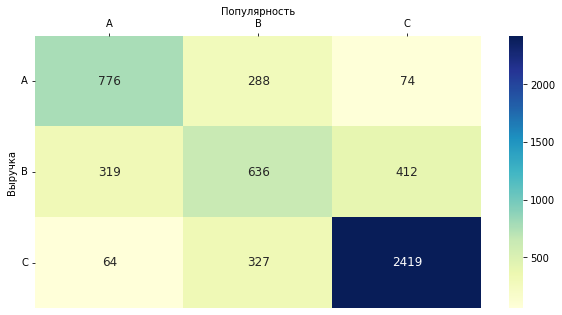

In [36]:
f, ax = plt.subplots(figsize=(10, 5)) # создадим фигуру и оси
                     
sns.heatmap(prod_pivot, 
            annot=True,
            cmap="YlGnBu",
            fmt='g',
            annot_kws={'size':12}) # вручную зададим размер шрифта в ячейках
            
# plt.title("RFM-анализ")            
plt.yticks(rotation=0) # вручную зададим угол подписей
ax.xaxis.set_ticks_position('top') # укажем, что подписи колонок должны быть наверху
ax.xaxis.set_label_position('top') # укажем, что подпись оси x должна быть наверху
            

plt.ylabel("Выручка")
plt.xlabel("Популярность")
plt.show()

## Задание 7

__Выгрузи данные по товарам с меткой по ABC-анализу__

1. Объедини по `stock_code` в одной таблице `ABC-код`, описание товара и `ID `

2. Выгрузи таблицу в `csv` для отправки в отдел закупок

# 🎉🎉🎉 Поздравляем, ты великолепен! 